In [96]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pns_data = pd.read_csv(r'D:\Dev\2026\BigData\national_pension.csv')
pns_data = pns_data.set_index(['Age_Group', 'Year'])
res_data = pd.read_csv(r'D:\Dev\2026\BigData\recipients_national_pension.csv')
res_data = res_data.set_index(['Age_Group', 'Year'])
yn_data = pd.read_csv(r'D:\Dev\2026\BigData\recipients_yn.csv')
yn_data = yn_data.set_index('Year')

# pns_data
# res_data
# yn_date

,,Old_Pension,Disability_Lsp,Disability_Pension,Survivor_Pension,Return_Lsp,Death_Lsp
Age_Group,Year,,,,,,
5-,2012,0,0,0,116,29,0
5~9,2012,0,0,0,1409,110,5
10~14,2012,0,0,0,5045,480,36
15~19,2012,0,0,0,8630,975,248
20~24,2012,0,12,35,222,1921,1605
...,...,...,...,...,...,...,...
60~64,2024,1236190,477,15931,114495,139612,5139
65~69,2024,2079090,4,6639,167905,9339,3374
70~74,2024,1147978,0,5764,186907,942,1956


In [90]:
# 년도별 1인당 부양수
include = ['Old_Pension', 'Disability_Pension', 'Survivor_Pension']

pns_gb_data = pns_data.groupby('Year').sum()
res_gb_data = res_data.groupby('Year').sum()

res_gb_data['Recipients_Total'] = res_gb_data[include].sum(axis=1)

res_gb_data
# res_gb_data

,Old_Pension,Disability_Lsp,Disability_Pension,Survivor_Pension,Return_Lsp,Death_Lsp,Recipients_Total
Year,,,,,,,
2012,2748455,2862,75934,496073,176531,18235,3320462
2013,2840660,2993,75041,536161,180233,18025,3451862
2014,2947422,2651,75387,575706,147035,21219,3598515
2015,3151349,2597,75688,617084,180705,23949,3844121
2016,3412350,2577,75497,659124,208620,26578,4146971
2017,3706516,2916,75486,705619,203449,22240,4487621
2018,3778824,3072,75734,756425,159967,20354,4610983
2019,4090497,3028,77872,808253,188851,21509,4976622
2020,4468126,2904,78079,857698,186422,22976,5403903


In [77]:
spt_data = pns_gb_data.join(res_gb_data)
spt_data = spt_data.join(yn_data)

spt_data['Spt_Per'] = spt_data['Recipients_Total'] / (spt_data['Subscriber_Count'] * spt_data['Npay_Per'] / 100) * 100

spt_data

,Subscriber_Count,Old_Pension,Disability_Lsp,Disability_Pension,Survivor_Pension,Return_Lsp,Death_Lsp,Recipients_Total,Npay_Per,Spt_Per
Year,,,,,,,,,,
2012,15663881,2748455,2862,75934,496073,176531,18235,3320462,77.56,27.331366
2013,16169339,2840660,2993,75041,536161,180233,18025,3451862,78.01,27.365972
2014,16554121,2947422,2651,75387,575706,147035,21219,3598515,75.49,28.795708
2015,17056789,3151349,2597,75688,617084,180705,23949,3844121,76.31,29.533731
2016,17659255,3412350,2577,75497,659124,208620,26578,4146971,77.73,30.211338
2017,17998055,3706516,2916,75486,705619,203449,22240,4487621,78.13,31.913378
2018,18612582,3778824,3072,75734,756425,159967,20354,4610983,79.58,31.130275
2019,18939569,4090497,3028,77872,808253,188851,21509,4976622,81.60,32.201374
2020,19009014,4468126,2904,78079,857698,186422,22976,5403903,78.97,35.998617


In [ ]:
# 미래 1인당 부양수 예측

<Axes: xlabel='Year'>

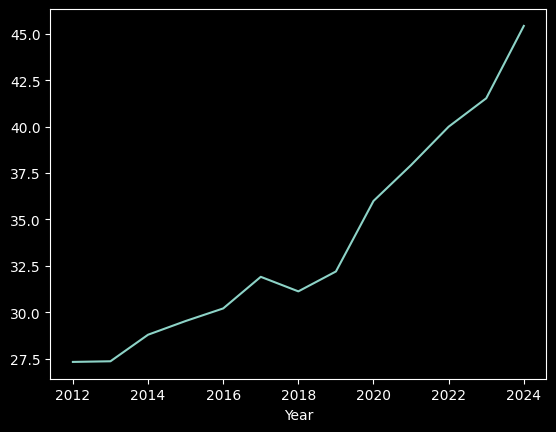

In [94]:
# 부양수 그래프
graph_data = spt_data['Spt_Per']

graph_data.plot.line()

In [ ]:
# 실질 금액